# Fig 2 - Raman Spectra
---

#### Overview
The purpose of this notebook is to generate the panels for Figure 2 of the publication "Rapid and inexpensive exploration of biology using high-dimensional Raman spectroscopy".

#### Imports

In [1]:
from pathlib import Path
from tqdm.notebook import tqdm
from natsort import natsorted

import numpy as np
import pandas as pd

In [2]:
# import function for plotting raw spectra
# from local directory
import sys
if "../code/" not in sys.path:
    sys.path.insert(-1, "../code/")

from plot_raw_spectra import plot_spectra

## Beer
---

#### Load beer metadata

Table of brewery, ABV, IBU, style, etc. regarding each beer.

In [3]:
# read csv file
csv_file = "../data/beer/metadata.csv"
beer_dataframe = pd.read_csv(csv_file).drop("Sample", axis=1)
# get number of beers
num_beers = len(beer_dataframe)

# sort beers by ABV
beer_dataframe = beer_dataframe.sort_values("ABV (%)", ascending=False)

# show table
beer_dataframe

,Beer,Brewery,Brewery Location,ABV (%),Style,IBU,Hops,Untappd Rating,Untappd Tags
0,Dark Majik,Lough Gill,"Sligo, Ireland",11.0,Imperial Irish Oatmeal Coffee Stout,0.00,NaN,3.91,Coffee; Smooth; Rich; Sweet; Boozy
1,Sneaky AF,Del Cielo Brewing Co,"Martinez, CA",10.0,Triple IPA,0.00,"CTZ, El Dorado, Summit, Idaho 7",3.99,Balanced; Aromatic; Light Bodied; Earth; Piney
2,Big Love,Almanac,"Alameda, CA",9.0,Hazy Double IPA,0.00,"Mosaic, Centennial, Citra",3.88,Hoppy; Citrus; Smooth; Strong; Light Bodied
3,Gnomes gone rogue,Original Pattern,"Oakland, CA",8.1,Hazy Double IPA,0.00,"NZ Rakau, Mosaic, Citra",4.13,Hazy; Juicy; Hoppy; Pineapple; Malty
4,Otto’s Jacket,Cellarmaker,"Oakland, CA",7.0,West Coast IPA,58.00,"Citra, Mosaic, HBC 586, Motueka",3.99,Piney; Hoppy; Light Bodied; Tropical; Clean
7,Kimchi Sour,Dokkaebier,"Oakland, CA",6.6,Sour,14.00,NaN,3.56,Ginger; Tart; Light Bodied; Spicy; Smoky
5,Love,Almanac,"Alameda, CA",6.1,Hazy IPA,0.00,"Sabro, Citra, Mosaic",3.88,Hazy; Juicy; Smooth; Hoppy; Tropical
6,Colour Me Murphy,Original Pattern Brewing,"Oakland, CA",6.0,Irish Red Ale,0.00,NaN,3.86,"Malty, Smooth, Caramel, Sweet Dry"
8,Hunky Jesus,Laughing Monk,"San Francisco, CA",5.5,Blood orange pale ale,0.00,NaN,3.71,"Clean, Citrus, Orange, Dry, Hoppy"
11,Kolschtastic,Gigantic Brewing Co,"Portland, OR",5.2,Kolsch,25.00,Mt Hood,3.60,Light Bodied; Clean; Floral; Sweet; Hoppy


#### Load beer spectra
Collect spectra as a mapping of sample and acquisition timestamp to the measured Raman spectrum.

```python
>>> beer_spectra
{
    ({beer 1}, {acq time 1}): [0.0163275, 0.0162255, 0.0162078, ..., 0.0145025, 0.0145972],
    ({beer 1}, {acq time 2}): [0.0166617, 0.0165251, 0.0164275, ..., 0.011637 , 0.0117089],
    ({beer 1}, {acq time 3}): [0.0165974, 0.0165717, 0.0165927, ..., 0.0125938, 0.012756],
    ({beer 2}, {acq time 1}): [0.0150748, 0.0148722, 0.0147438, ..., 0.00848608, 0.0085389],
    ...
}
```

In [4]:
# create a mapping for the beer names in the csv file to
# the beer names in the dataframe
beer_names_dataframe = beer_dataframe["Beer"].tolist()
beer_name_mapping = {name.split(" ")[0][:4].lower(): name for name in beer_names_dataframe}

# glob all the beer spectra csvs
csv_files = Path("../data/beer/").glob("*/*.csv")
beer_spectra = {}

# loop through spectral data
for csv_file in csv_files:
    # match beer name from csv file to beer name in dataframe
    # using the first word of the beer name in the csv file
    beer_name_csv = csv_file.parent.name.split("-")[0]
    beer_name = beer_name_mapping[beer_name_csv[:4]]

    # mapping for spectral data
    key = (beer_name, csv_file.stem)
    spectrum = pd.read_csv(csv_file)["Intensity (a.u.)"].values
    beer_spectra[key] = spectrum

#### Plot spectra

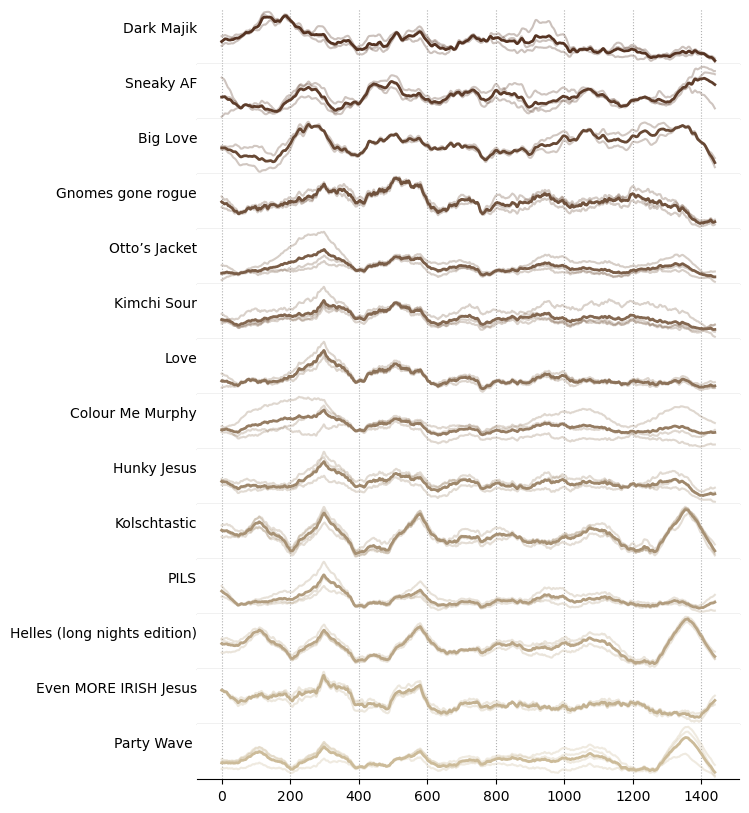

In [5]:
# dark to light brown
beer_colors = ["#553322", "#ccbb99"]

# order beers by ABV
beer_names_ordered = beer_dataframe.sort_values("ABV (%)", ascending=False)["Beer"].tolist()

# plot spectra
plot_spectra(
    beer_spectra,
    beer_dataframe,
    samples_ordered=beer_names_ordered,
    colors=beer_colors,
    filename="../results/Fig-2_panel-A.svg",
)

## Chilis
---
For each chili sample, we acquired Raman spectra from both the flesh and the seed. Here we show the spectra from only the seeds.

#### Load chili metadata

Table of variety, condition, hotness, color, etc. regarding each chili.

In [6]:
# read csv file
csv_file = "../data/peppers_seeds/metadata.csv"
chili_dataframe = pd.read_csv(csv_file).drop("Unnamed: 0", axis=1)
# get number of chilis
num_chilis = len(chili_dataframe)

# filter to only sample type == seed
chili_dataframe = chili_dataframe.loc[chili_dataframe["sample_type"] == "seed"]
# sort chilis by hotness (Scoville units)
chili_dataframe = chili_dataframe.sort_values("mean_scoville", ascending=False)

# show table
chili_dataframe.head(10)

,Abbreviation,chili_variety,chili_condition,sample_type,species_name,scoville,max_scoville,min_scoville,mean_scoville,color
7,OrHa,Orange Habanero,fresh,seed,Capsicum chinense,150000-350000,150000,350000,250000,orange
5,ReTh,Red thai,fresh,seed,Capsicum annuum,110000,110000,110000,110000,red
4,GrTh,Green Thai,fresh,seed,Capsicum annuum,50000-100000,50000,100000,75000,green
9,InLo,Indian Long chili,fresh,seed,Capsicum annuum,25000-100000,25000,100000,62500,green
13,CrRe,Crushed red chili,dried,seed,NaN,32000-48000,32000,48000,40000,red
16,Arbol,Chili de arbol,dried,seed,NaN,15000-30000,15000,30000,22500,red
17,Serr,Serrano,fresh,seed,NaN,10000-23000,10000,23000,16500,red
19,YeWa,Yellow wax,fresh,seed,NaN,5000-15000,5000,15000,10000,yellow
0,HuWa,Hungarian Wax,fresh,seed,Capsicum annuum var. annuum 'Hungarian wax',1000-15000,1000,15000,8000,yellow
12,Fres,Fresno,fresh,seed,Capsicum annuum,2500-10000,2500,10000,6250,red


#### Load chili spectra
Collect spectra as a mapping of sample and acquisition timestamp to the measured Raman spectrum.

```python
>>> chili_spectra
{
    ({chili 1}, {acq time 1}): [0.00888093, 0.00887517, 0.00890599, ..., 0.00254364, 0.00254364,
    ({chili 1}, {acq time 2}): [0.012747  , 0.0126361 , 0.0125852 , ..., 0.00258432, 0.00258432,
    ({chili 1}, {acq time 3}): [0.00991234, 0.00984567, 0.00979391, ..., 0.00407849, 0.00409203,
    ({chili 2}, {acq time 1}): [0.00902905, 0.00897933, 0.00894588, ..., 0.0071553 , 0.0071706,
    ...
}
```

In [7]:
# glob all the chili spectra csvs
csv_files = Path("../data/peppers_seeds/").glob("*/*.csv")
chili_spectra = {}

# loop through spectral data
for csv_file in csv_files:
    # match chili name from csv file to chili name in dataframe
    chili_name_csv = csv_file.parent.name
    chili_name = chili_dataframe.loc[
        chili_dataframe["Abbreviation"] == chili_name_csv
    ]["chili_variety"].item()

    # mapping for spectral data
    key = (chili_name, csv_file.stem)
    spectrum = pd.read_csv(csv_file)["Intensity (a.u.)"].values
    chili_spectra[key] = spectrum

#### Plot spectra

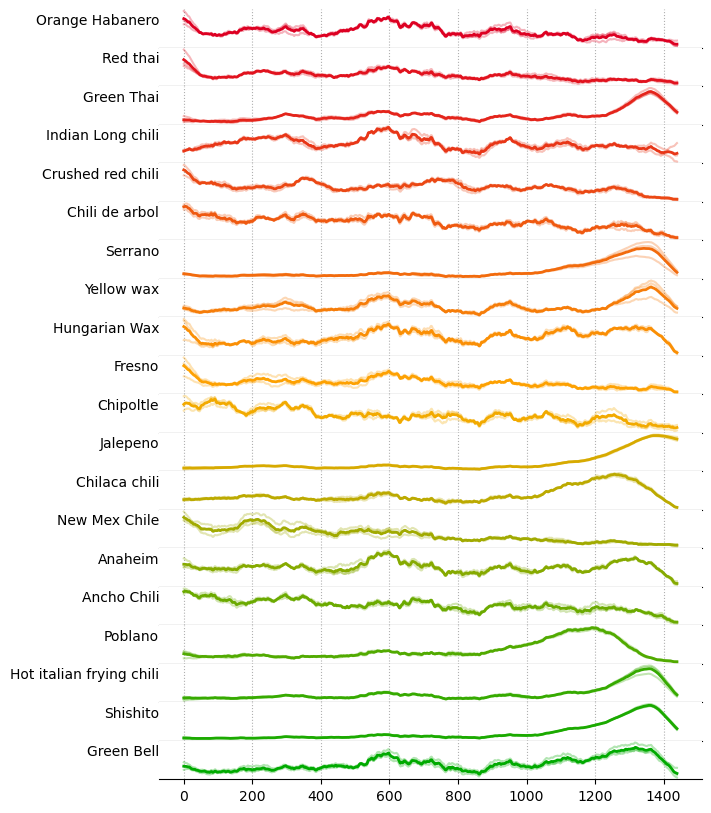

In [8]:
# red to yellow to green
chili_colors = ["#dd0022", "#ffaa00" ,"#00aa00"]

# order beers by ABV
chili_names_ordered = chili_dataframe.sort_values(
    "mean_scoville", ascending=False
)["chili_variety"].tolist()

# plot spectra
plot_spectra(
    chili_spectra,
    chili_dataframe,
    samples_ordered=chili_names_ordered,
    colors=chili_colors,
    filename="../results/Fig-2_panel-B.svg",
)

## Algae
---

#### Load algae metadata

List of the sea algae samples.

In [9]:
# read csv file
csv_file = "../data/algae/metadata.csv"
algae_dataframe = pd.read_csv(csv_file)
# get number of algae samples
num_algae = len(algae_dataframe)

# show table
algae_dataframe

,Sample
0,cc124
1,cc1373
2,13f6
3,13f5
4,13f4
5,13f3
6,I.gal


#### Load algae spectra
Collect spectra as a mapping of sample and acquisition timestamp to the measured Raman spectrum.

```python
>>> algae_spectra
{
    ({algae 1}, {acq time 1}): [0.0061049, 0.0061894, 0.00635227, ..., 0.17652   , 0.17714,
    ({algae 1}, {acq time 2}): [0.0066941, 0.0067958, 0.00689678, ..., 0.179551  , 0.180157,
    ({algae 1}, {acq time 3}): [0.0090073, 0.0091416, 0.00933474, ..., 0.184525  , 0.185151,
    ({algae 2}, {acq time 1}): [0.0141496, 0.0141307, 0.0140716, ..., 0.237683 , 0.237874,
    ...
}
```

In [10]:
# mapping for algae names in csv files to names
# in the dataframe
algae_name_mapping = {
    "cc124": "cc124",
    "cc1373": "cc1373",
    "13f6": "13f6",
    "13f5": "13f5",
    "13f4": "13f4",
    "13f3": "13f3",
    "isochrysis": "I.gal",
}

# glob all the algae spectra csvs
csv_files = Path("../data/algae/").glob("*/*.csv")
algae_spectra = {}

# loop through spectral data
for csv_file in csv_files:
    # map algae name from csv directory to the species
    # or strain name in the dataframe
    algae_name_csv = csv_file.parent.name
    algae_name = algae_name_mapping[algae_name_csv]

    # mapping for spectral data
    key = (algae_name, csv_file.stem)
    spectrum = pd.read_csv(csv_file)["Intensity (a.u.)"].values
    algae_spectra[key] = spectrum

#### Plot spectra

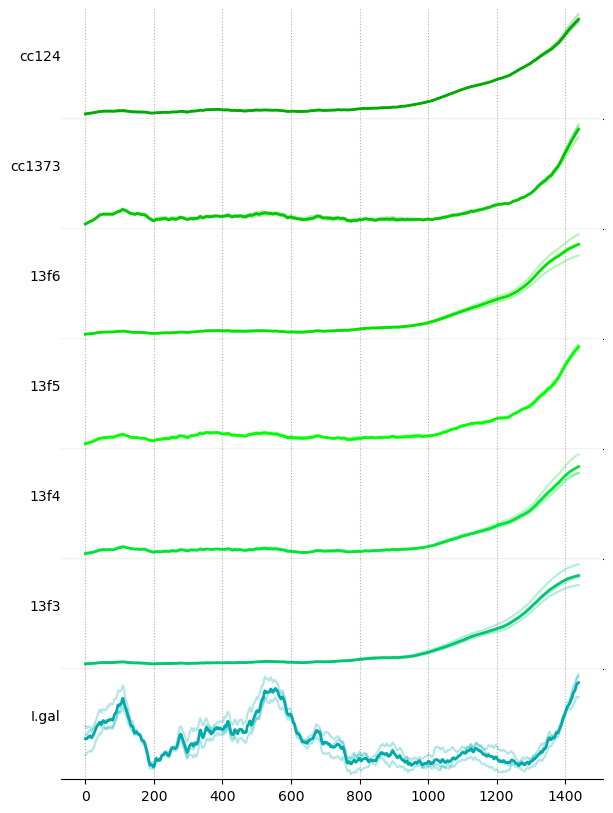

In [11]:
# dark green to bright green to teal
algae_colors = ["#00aa00", "#00ff00" ,"#00aaaa"]

# order algae samples
algae_names_ordered = algae_dataframe["Sample"].tolist()

# plot spectra
plot_spectra(
    algae_spectra,
    algae_dataframe,
    samples_ordered=algae_names_ordered,
    colors=algae_colors,
    filename="../results/Fig-2_panel-C.svg",
)